# Task1

In [3]:
%matplotlib inline

In [4]:
pip install seaborn

     |████████████████████████████████| 285 kB 4.7 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sb

1. Load the data into a Pandas Dataframe.

In [7]:
mobile_data = pd.read_csv("mobile_price_1.csv")

2. Which of the categorical features are nominal and which are ordinal?

    Numinal categorical features => bluetooth | screen | sim
    
    Ordinal categorical features => gen | cores | speed | wifi

3. Add a column that holds the total screen resolution for each device. Name it resolution.

In [8]:
mobile_data["resolution"] = (mobile_data["px_width"] * mobile_data["px_height"])

4. Add a column that holds the DPI (dots per inch) of the screen width and name it DPI_w.

In [9]:
inchToCm = 0.3937
mobile_data["DPI_w"] = np.where(mobile_data["sc_w"] == 0, np.nan, mobile_data["px_width"] / mobile_data["sc_w"] * inchToCm)

5. Add a column that holds the ratio battery_power/talk_time and name it call_ratio.

In [10]:
mobile_data["call_ratio"] = mobile_data["battery_power"] / mobile_data["talk_time"]

6. Change the memory column to hold the memory in GB instead of MB.

In [11]:
mobile_data["memory"] = mobile_data["memory"] / 1024 #1GB = 1024MB

7. Include the output of the `describe()` function of the dataframe.

In [12]:
mobile_data.describe()

,id,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,gen,f_camera,camera,memory,price,resolution,DPI_w,call_ratio
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,1526.000000,1899.000000,2000.000000,2000.00000,2.000000e+03,1820.000000,2000.000000
mean,999.500000,1238.518500,0.501750,140.249000,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,3.283000,5.648100,10.443918,31.783456,862.02435,9.052601e+05,144.332355,166.672629
std,577.494589,439.418206,0.288416,35.399655,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.824773,4.140169,5.763826,17.735803,230.26348,8.297625e+05,153.865154,156.664965
min,0.000000,501.000000,0.100000,80.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,2.000000,1.000000,1.000000,1.908203,307.11000,0.000000e+00,12.598400,25.100000
25%,499.750000,851.750000,0.200000,109.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,3.000000,2.000000,6.000000,16.036133,698.46750,2.632005e+05,49.527460,75.737500
50%,999.500000,1226.000000,0.500000,141.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,4.000000,5.000000,10.000000,31.545898,837.63000,6.013590e+05,83.212869,111.369318
75%,1499.250000,1615.250000,0.800000,170.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,4.000000,8.000000,15.000000,47.207275,1006.71250,1.359027e+06,173.687317,186.193750
max,1999.000000,1998.000000,1.000000,200.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,4.000000,19.000000,20.000000,63.400391,1728.97000,3.886306e+06,783.856700,989.500000


8. Include a histogram of the prices.

Text(0.5, 1.0, 'Prices Histogram')

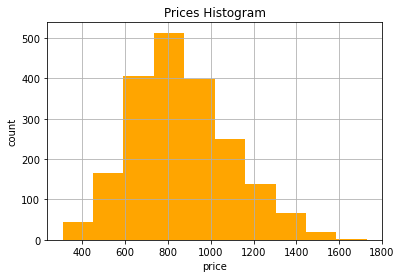

In [14]:
mobile_data["price"].hist(color="orange")
plt.xlabel("price")
plt.ylabel("count")
plt.title("Prices Histogram")

# Task2

1. Plot a correlation heatmap of the data set and include it.

<AxesSubplot:title={'center':'Correlation Heatmap Numerical values'}>

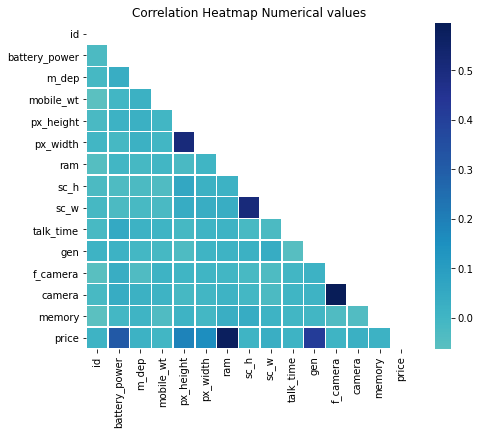

In [15]:
data = pd.read_csv("mobile_price_1.csv")
corr = data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Correlation Heatmap Numerical values")
cmap = sb.diverging_palette(200, 10, as_cmap=True)
sb.heatmap(corr, mask=mask, cmap="YlGnBu", center=0, square=True, linewidths=.5)

2. Which features would you say are correlated with the device price?

    Features correlated the most with the device price are:
    'battery_power', 'ram' and 'gen'.

3. Are there features not shown in the correlation matrix that are correlated with the price? If so, what are they?

    There are no other features correlated with the device price.

4. For each feature correlated with the price, plot its relationship with price.

Text(0, 0.5, 'price')

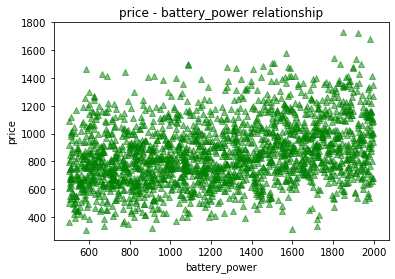

In [16]:
plt.scatter(data.battery_power, data.price, alpha=0.5, marker='^', color='green')
plt.title('price - battery_power relationship'.format(data.battery_power, data.price))
plt.xlabel('battery_power')
plt.ylabel('price')

Text(0, 0.5, 'price')

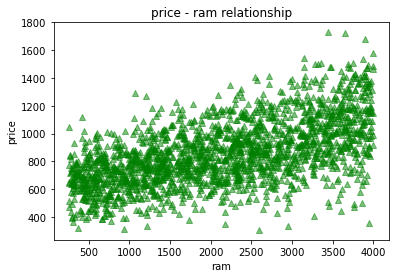

In [17]:
plt.scatter(data.ram, data.price, alpha=0.5, marker='^', color='green')
plt.title('price - ram relationship'.format(data.ram, data.price))
plt.xlabel('ram')
plt.ylabel('price')

Text(0, 0.5, 'price')

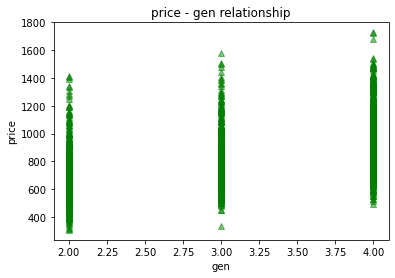

In [18]:
plt.scatter(data.gen, data.price, alpha=0.5, marker='^', color='green')
plt.title('price - gen relationship')
plt.xlabel('gen')
plt.ylabel('price')

5. Select 3 features that are correlated with price and create a pivot table showing average price
with relation to cross sections of those 3 features (remember to divide numerical features into cuts, for example quartile cuts).

In [19]:
battery_power = pd.qcut(data['battery_power'], 4)
ram = pd.qcut(data['ram'], 4)
gen = pd.cut(data['gen'], [2,3,4])
data.pivot_table('price', [battery_power, ram, gen])

price
battery_power     ram               gen                
(500.999, 851.75] (255.999, 1207.5] (2, 3]   579.873750
                                    (3, 4]   703.555429
                  (1207.5, 2146.5]  (2, 3]   713.162222
                                    (3, 4]   792.796607
                  (2146.5, 3064.5]  (2, 3]   761.110488
                                    (3, 4]   888.411094
                  (3064.5, 3998.0]  (2, 3]   951.960000
                                    (3, 4]  1023.281304
(851.75, 1226.0]  (255.999, 1207.5] (2, 3]   599.932333
                                    (3, 4]   739.327031
                  (1207.5, 2146.5]  (2, 3]   761.402432
                                    (3, 4]   861.699870
                  (2146.5, 3064.5]  (2, 3]   843.563793
                                    (3, 4]   947.322759
                  (3064.5, 3998.0]  (2, 3]   982.348611
                                    (3, 4]  1082.820000
(1226.0, 1615.25] (255.999, 1207.5] (2, 3]   667.167000
                                    (3, 4]   813.443103
                  (1207.5, 2146.5]  (2, 3]   780.206800
                                    (3, 4]   917.325797
                  (2146.5, 3064.5]  (2, 3]   874.997188
                                    (3, 4]   994.800000
                  (3064.5, 3998.0]  (2, 3]  1083.341786
                                    (3, 4]  1180.398987
(1615.25, 1998.0] (255.999, 1207.5] (2, 3]   785.555484
                                    (3, 4]   832.262121
                  (1207.5, 2146.5]  (2, 3]   844.500690
                                    (3, 4]   974.136984
                  (2146.5, 3064.5]  (2, 3]   953.717333
                                    (3, 4]  1092.511644
                  (3064.5, 3998.0]  (2, 3]  1075.808000
                                    (3, 4]  1216.372571

# Task3

1. For each ordinal feature <O>, add a column to the dataframe which holds the ordered values representing each original value of F. This new column will be named <O>_ord. (without the triangle brackets)

In [20]:
# data['gen_ord'] = pd.Categorical(data.cores, ordered=True, categories=[2,3,4]) already a numeric value [2,3,4]
data['cores_ord'] = pd.Categorical(data.cores, ordered=True, categories=['single', 'dual', 'triple', 'quad', 'penta', 'hexa', 'hepta', 'octa']).codes+1
data['speed_ord'] = pd.Categorical(data.speed, ordered=True, categories=['low', 'medium', 'high']).codes+1
data['wifi_ord'] = pd.Categorical(data.wifi, ordered=True, categories=['none', 'a', 'b', 'g', 'n']).codes+1
data.head(10)

,id,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,...,sim,f_camera,camera,memory,screen,wifi,price,cores_ord,speed_ord,wifi_ord
0,0,842,0.6,188,20,756,2549,9,7,19,...,Single,1.0,2.0,7568,LCD,g,751.64,2,2,4
1,1,1021,0.7,136,905,1988,2631,17,3,7,...,Dual,NaN,6.0,53759,Touch,none,885.17,3,1,1
2,2,563,0.9,145,1263,1716,2603,11,2,9,...,Dual,2.0,6.0,41140,Touch,none,1067.78,5,1,1
3,3,615,0.8,131,1216,1786,2769,16,8,11,...,Single,NaN,9.0,10558,LCD,none,819.22,6,3,1
4,4,1821,0.6,141,1208,1212,1411,8,2,15,...,Single,13.0,14.0,44436,Touch,none,1023.13,2,2,1
5,5,1859,0.7,164,1004,1654,1067,17,1,10,...,Dual,3.0,7.0,22633,LCD,none,877.77,1,1,1
6,6,1821,0.8,139,381,1018,3220,13,8,18,...,Single,4.0,10.0,10738,LCD,g,1103.21,8,2,4
7,7,1954,0.8,187,512,1149,700,16,3,5,...,Dual,NaN,NaN,24565,Touch,g,858.49,4,1,4
8,8,1445,0.7,174,386,836,1099,17,1,20,...,Single,NaN,14.0,53445,LCD,none,590.74,7,1,1
9,9,509,0.1,93,1137,1224,513,19,10,12,...,Dual,2.0,15.0,9468,LCD,none,679.55,5,1,1


2. For each nominal feature <N>, add a binary column OR one-hot encoding (whichever is relevant for that feature) to the dataframe representing the original values. Name binary columns <N>_bin, and prefix one-hot encodings with <N>. (without the triangle brackets)

In [21]:
data['bluetooth_bin'] = pd.Categorical(data.bluetooth, ordered=False, categories=['No', 'Yes']).codes
data['screen_bin'] = pd.Categorical(data.screen, ordered=False, categories=['LCD', 'Touch']).codes
data['sim_bin'] = pd.Categorical(data.sim, ordered=False, categories=['Single', 'Dual']).codes
data.head(10)

,id,battery_power,m_dep,mobile_wt,px_height,px_width,ram,sc_h,sc_w,talk_time,...,memory,screen,wifi,price,cores_ord,speed_ord,wifi_ord,bluetooth_bin,screen_bin,sim_bin
0,0,842,0.6,188,20,756,2549,9,7,19,...,7568,LCD,g,751.64,2,2,4,0,0,0
1,1,1021,0.7,136,905,1988,2631,17,3,7,...,53759,Touch,none,885.17,3,1,1,1,1,1
2,2,563,0.9,145,1263,1716,2603,11,2,9,...,41140,Touch,none,1067.78,5,1,1,1,1,1
3,3,615,0.8,131,1216,1786,2769,16,8,11,...,10558,LCD,none,819.22,6,3,1,1,0,0
4,4,1821,0.6,141,1208,1212,1411,8,2,15,...,44436,Touch,none,1023.13,2,2,1,1,1,0
5,5,1859,0.7,164,1004,1654,1067,17,1,10,...,22633,LCD,none,877.77,1,1,1,0,0,1
6,6,1821,0.8,139,381,1018,3220,13,8,18,...,10738,LCD,g,1103.21,8,2,4,0,0,0
7,7,1954,0.8,187,512,1149,700,16,3,5,...,24565,Touch,g,858.49,4,1,4,0,1,1
8,8,1445,0.7,174,386,836,1099,17,1,20,...,53445,LCD,none,590.74,7,1,1,1,0,0
9,9,509,0.1,93,1137,1224,513,19,10,12,...,9468,LCD,none,679.55,5,1,1,1,0,1


3. Plot a correlation heatmap of the modified data set and include it.

Text(0.5, 1.0, 'Heatmap of the modified data')

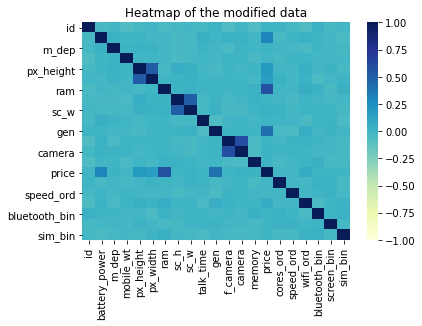

In [22]:
corr = data.corr()
sb.heatmap(corr, vmin=-1, cmap="YlGnBu")
plt.title("Heatmap of the modified data")

4. Save the entire dataframe to a csv file named “mobile_prices_converted.csv” and include it in
the submission. Make sure you don’t add a redundant index column.

In [ ]:
data.to_csv('mobile_prices_converted.csv', index=False) # attached in the zip file

# Task4

1. Choose 4 features and use a 2-d plot to show the relationships between each pair. This should be done in the form of a 4x4 plot matrix as shown in class.

Text(0.5, 1.0, 'Relationships between pairs')

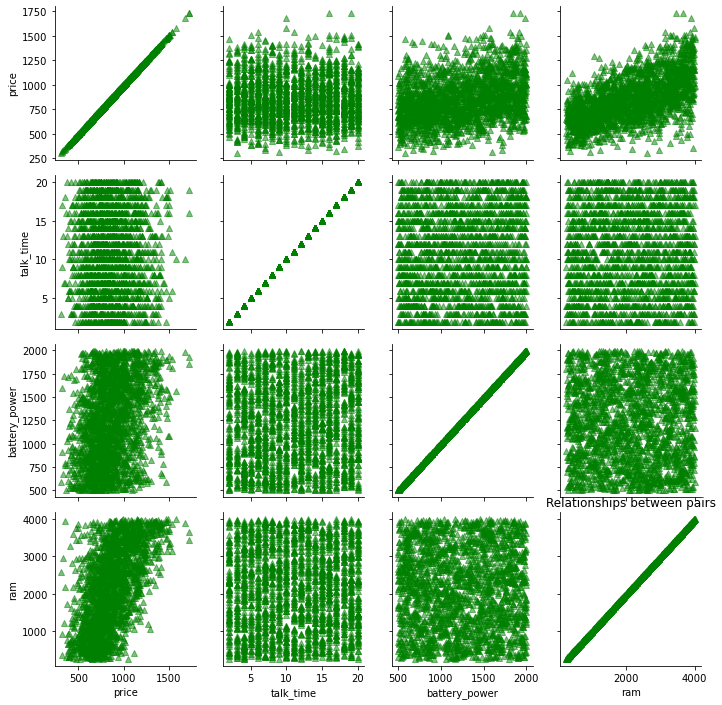

In [23]:
grid = sb.PairGrid(data, vars=['price', 'talk_time', 'battery_power', 'ram'])
grid.map(plt.scatter, alpha=0.5, color='green', marker='^')
plt.title('Relationships between pairs')

2. We have shown in class how to plot 4 dimensions of data in a 2-dimensional plot. Use this method to plot the relationship between px_width, px_height, price and core. Px_width and px_height should be the X and Y coordinates respectively.

Text(0.5, 1.0, 'Relationship between px_width, px_height, price and core')

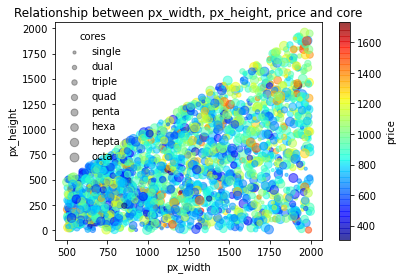

In [24]:
sorted_cores = ['single', 'dual', 'triple', 'quad', 'penta', 'hexa', 'hepta', 'octa']
diff_cores = pd.Categorical(data['cores'], ordered=True, categories=sorted_cores)
plt.scatter(data.px_width, data.px_height, s=(diff_cores.codes+1)*10, c=data.price, alpha=0.5, cmap='jet')
plt.xlabel('px_width')
plt.ylabel('px_height')
plt.colorbar(label='price')
for i,c in enumerate(sorted_cores):
    plt.scatter([], [], c='k', alpha=0.3, s=(i+1)*10, label=c)

plt.legend(scatterpoints=1, frameon=False, labelspacing=0.5, title='cores')
plt.title("Relationship between px_width, px_height, price and core")

3. There is an additional file named “mobile_prices_2.csv” distributed alongside the exercise. This file contains a mapping of id to price. This price is a transformation of the price in the original data set. The transformation has been made based on a single feature from the data set. Which feature was used and how do you know? Include any relevant plots and tables.

Text(0.5, 1.0, 'diffrence between price and price_2')

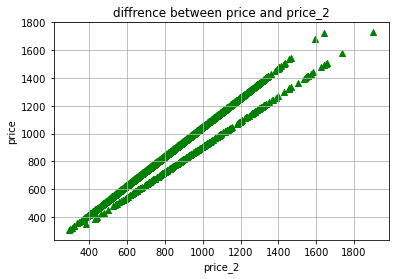

In [25]:
mobile_data_2 = pd.read_csv('mobile_price_2.csv')
plt.scatter(mobile_data_2['price_2'], data['price'], marker='^', color='green')
plt.xlabel('price_2')
plt.ylabel('price')
plt.grid()
plt.title("diffrence between price and price_2")

Text(0.5, 1.0, 'price_2/price - id')

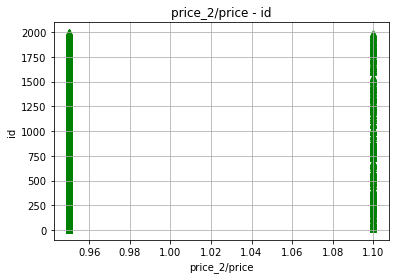

In [26]:
plt.scatter((mobile_data_2['price_2']/data['price']), data['id'], marker='^', color='green')
plt.xlabel('price_2/price')
plt.ylabel('id')
plt.grid()
plt.title("price_2/price - id")

In [27]:
data_1 = pd.read_csv('mobile_price_1.csv')
data_1['price_2/price_1'] = mobile_data_2['price_2']/data_1['price']

<AxesSubplot:title={'center':'Heatmap to locate the price_2 based on feature'}>

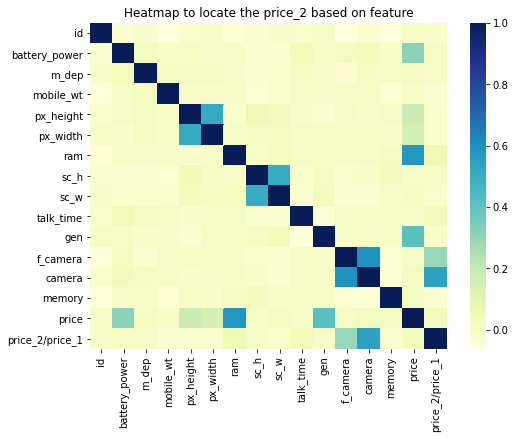

In [28]:
corr = data_1.corr()
f, ax = plt.subplots(figsize=(8, 6))
ax.set_title("Heatmap to locate the price_2 based on feature")
sb.heatmap(corr, cmap="YlGnBu")

According to the heatmap we can tell that the transformation that has been made is based on 'camera' feature.

In [29]:
corr['camera'] #here we can see that the highest value is price_2/price_1 - camera

id                -0.015570
battery_power      0.038858
m_dep              0.020520
mobile_wt          0.011866
px_height         -0.010504
px_width           0.001323
ram                0.013743
sc_h              -0.006083
sc_w              -0.025007
talk_time          0.003117
gen                0.009832
f_camera           0.595713
camera             1.000000
memory            -0.040941
price              0.027444
price_2/price_1    0.543707
Name: camera, dtype: float64